# Analyze new scaling parameters which now include max and min values. 20 October 2023
1. This notebook first produces global plots of max and min values. 
2. It then parses the log files to determine how many times scaled observations have been trucated.
3. It then produces a plot of global unscaled and scaled observations, and the model forecast.

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from mapper_functions import plot_global
from mapper_functions import plot_na
from mapper_functions import plot_global_contour

from my_functions import read_obsfcstana

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from mapper_functions import plot_global_contour

# Open the netCDF file using xarray
ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim_db/M36_zscore_stats_2015_doy91_2021_doy90_W_75d_Nmin_5_spALL_all_pentads.nc4', decode_times=False)

# Select the variable of interest (o_mean) for pentad 31
o_mean = ds['o_mean'].sel(pentad=31)
o_std = ds['o_std'].sel(pentad=31)
m_mean = ds['m_mean'].sel(pentad=31)
m_std = ds['m_std'].sel(pentad=31)

lat = ds['lat']
lon = ds['lon']

m_min = ds['m_min']
m_max = ds['m_max']

# Replace values less than -10 with NaN
o_mean = np.where(o_mean < -9998, np.nan, o_mean)
o_std = np.where(o_std < -9998, np.nan, o_std)
m_mean = np.where(m_mean < -9998, np.nan, m_mean)
m_std = np.where(m_std < -9998, np.nan, m_std)
m_min = np.where(m_min < -9998, np.nan, m_min)
m_max = np.where(m_max < -9998, np.nan, m_max)

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

In [3]:
m_range = m_max - m_min
m_range_min = np.nanmin(m_range)
m_range_max = np.nanmax(m_range)
print('m_range_min = ', m_range_min, 'm_range_max = ', m_range_max)

m_range_min =  0.0027966126799583435 m_range_max =  0.8041068259626627


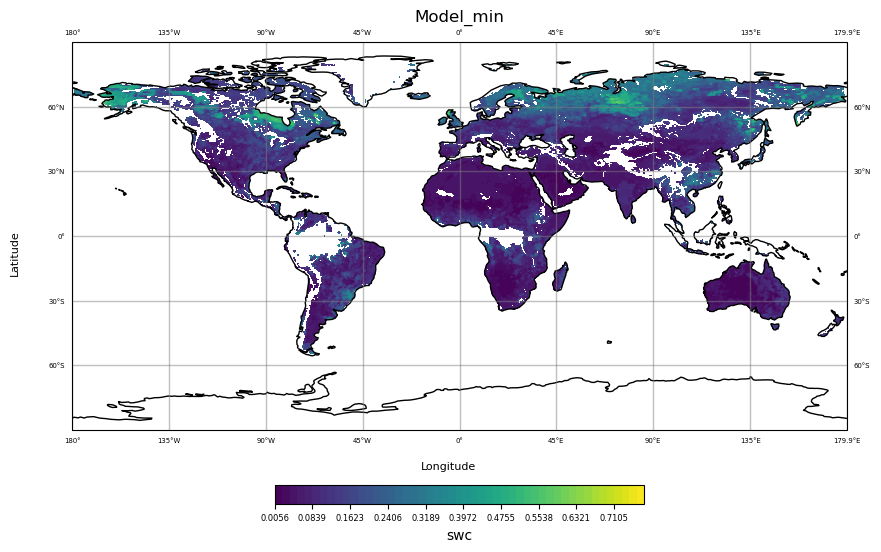

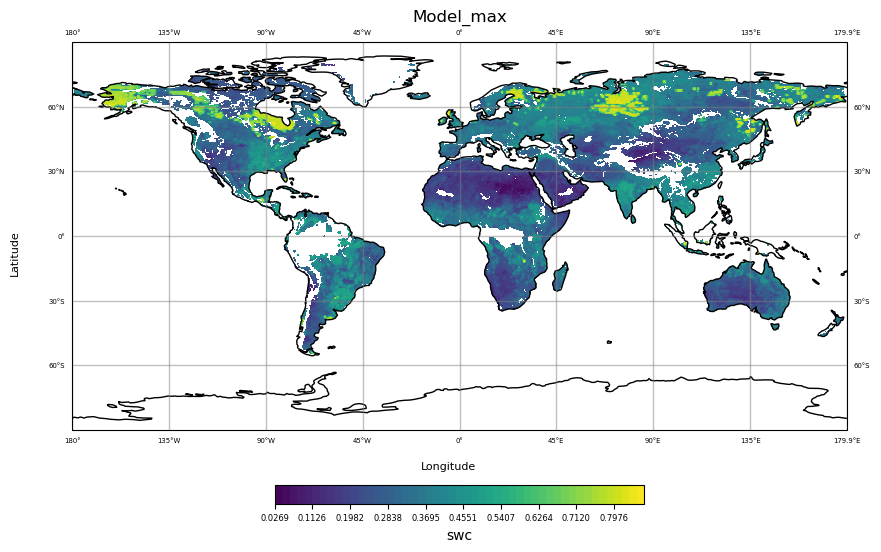

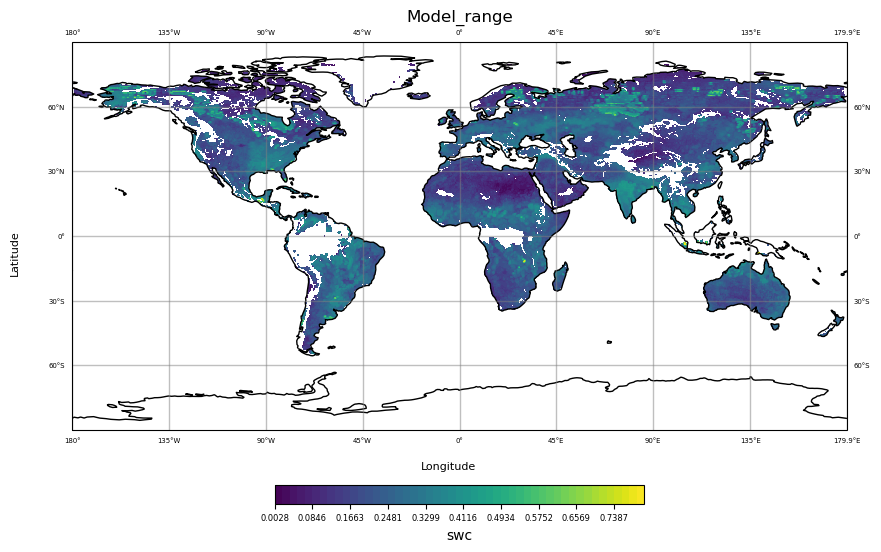

In [5]:
plot_global_contour(lon2d, lat2d, m_min.T, False, 'Model_min', 'swc')
plot_global_contour(lon2d, lat2d, m_max.T, False, 'Model_max', 'swc')
plot_global_contour(lon2d, lat2d, m_range.T, False, 'Model_range', 'swc')

 Saving figure as m_min_cnt.png 



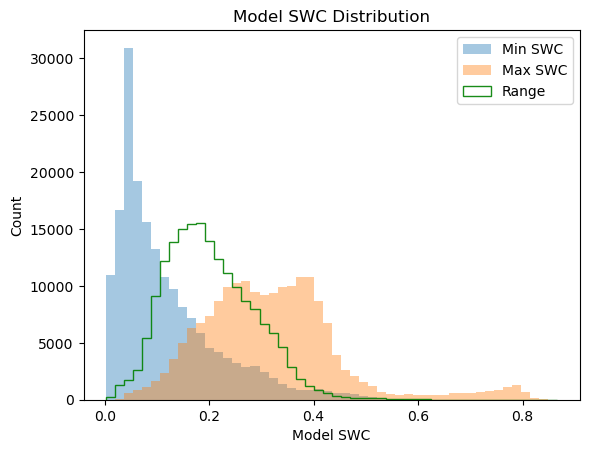

In [4]:
# Generate data
# Create a boolean mask that identifies NaN values in data1
mask = np.isnan(m_min.flatten())
data1 = m_min.flatten()[~mask]

mask = np.isnan(m_max.flatten())
data2 = m_max.flatten()[~mask]

mask = np.isnan(m_range.flatten())
data3 = m_range.flatten()[~mask]

# Define bin edges
combined_data = np.concatenate([data1, data2, data3])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Min SWC')
n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Max SWC')
n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Range', color='green', histtype='step', linewidth=1)

# Add labels and title
ax.set_xlabel('Model SWC')
ax.set_ylabel('Count')
ax.set_title('Model SWC Distribution')
ax.legend()

savename = 'm_min_cnt.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

In [6]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04', 
         '/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M05',
         '/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06',
         '/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M07',
         '/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08',
         '/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M09'
        ]

# Define the common file name start
file_name_start = 'OLv7_M36_ascat.ens_avg.ldas_ObsFcstAna.2015'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_obsvar_list = []
obs_fcst_list = []
obs_fcstvar_list = []
obs_ana_list = []
obs_anavar_list = []

# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_obsvar_list.append(obs_obsvar)
    obs_fcst_list.append(obs_fcst)
    obs_fcstvar_list.append(obs_fcstvar)
    obs_ana_list.append(obs_ana)
    obs_anavar_list.append(obs_anavar)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_obsvar = np.concatenate(obs_obsvar_list)
obs_fcst = np.concatenate(obs_fcst_list)
obs_fcstvar = np.concatenate(obs_fcstvar_list)
obs_ana = np.concatenate(obs_ana_list)
obs_anavar = np.concatenate(obs_anavar_list)

# Save the combined values to a file
np.savez('combined_values.npz', date_time=date_time, obs_species=obs_species, obs_tilenum=obs_tilenum, obs_lon=obs_lon, obs_lat=obs_lat, 
         obs_obs=obs_obs, obs_obsvar=obs_obsvar, obs_fcst=obs_fcst, obs_fcstvar=obs_fcstvar, obs_ana=obs_ana, obs_anavar=obs_anavar)


Total number of obs =  2898256
Total number of obs =  3436207
Total number of obs =  3711838
Total number of obs =  3662331
Total number of obs =  3293132
Total number of obs =  3110069


In [7]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_compressed/ASCAT_test_new_scaling_compressed/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04', 
         '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_compressed/ASCAT_test_new_scaling_compressed/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M05',
         '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_compressed/ASCAT_test_new_scaling_compressed/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06',
         '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_compressed/ASCAT_test_new_scaling_compressed/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M07',
         '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_compressed/ASCAT_test_new_scaling_compressed/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08',
         '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_compressed/ASCAT_test_new_scaling_compressed/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M09'
        ]

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_compressed.ens_avg.ldas_ObsFcstAna.2015'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_obsvar_list = []
obs_fcst_list = []
obs_fcstvar_list = []
obs_ana_list = []
obs_anavar_list = []

# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_obsvar_list.append(obs_obsvar)
    obs_fcst_list.append(obs_fcst)
    obs_fcstvar_list.append(obs_fcstvar)
    obs_ana_list.append(obs_ana)
    obs_anavar_list.append(obs_anavar)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_obsvar = np.concatenate(obs_obsvar_list)
obs_fcst = np.concatenate(obs_fcst_list)
obs_fcstvar = np.concatenate(obs_fcstvar_list)
obs_ana = np.concatenate(obs_ana_list)
obs_anavar = np.concatenate(obs_anavar_list)

# Save the combined values to a file
np.savez('combined_values2.npz', date_time=date_time, obs_species=obs_species, obs_tilenum=obs_tilenum, obs_lon=obs_lon, obs_lat=obs_lat, 
         obs_obs=obs_obs, obs_obsvar=obs_obsvar, obs_fcst=obs_fcst, obs_fcstvar=obs_fcstvar, obs_ana=obs_ana, obs_anavar=obs_anavar)


Total number of obs =  2898435
Total number of obs =  3432810
Total number of obs =  3705775
Total number of obs =  3655868
Total number of obs =  3287854
Total number of obs =  3105882


In [5]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M05',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M07',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M09'
        ]

# Define the common file name start
file_name_start = 'ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.2015'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_obsvar_list = []
obs_fcst_list = []
obs_fcstvar_list = []
obs_ana_list = []
obs_anavar_list = []

# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_obsvar_list.append(obs_obsvar)
    obs_fcst_list.append(obs_fcst)
    obs_fcstvar_list.append(obs_fcstvar)
    obs_ana_list.append(obs_ana)
    obs_anavar_list.append(obs_anavar)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_obsvar = np.concatenate(obs_obsvar_list)
obs_fcst = np.concatenate(obs_fcst_list)
obs_fcstvar = np.concatenate(obs_fcstvar_list)
obs_ana = np.concatenate(obs_ana_list)
obs_anavar = np.concatenate(obs_anavar_list)

# Save the combined values to a file
np.savez('combined_values3.npz', date_time=date_time, obs_species=obs_species, obs_tilenum=obs_tilenum, obs_lon=obs_lon, obs_lat=obs_lat, 
         obs_obs=obs_obs, obs_obsvar=obs_obsvar, obs_fcst=obs_fcst, obs_fcstvar=obs_fcstvar, obs_ana=obs_ana, obs_anavar=obs_anavar)

Total number of obs =  2897973
Total number of obs =  3435882
Total number of obs =  3711441
Total number of obs =  3661887
Total number of obs =  3292770
Total number of obs =  3109731


In [6]:
# Load the saved values from the file
data = np.load('combined_values.npz', allow_pickle=True)

# Access the variables
date_time = data['date_time']
obs_species = data['obs_species']
obs_tilenum = data['obs_tilenum']
obs_lon = data['obs_lon']
obs_lat = data['obs_lat']
obs_obs = data['obs_obs']
obs_obsvar = data['obs_obsvar']
obs_fcst = data['obs_fcst']
obs_fcstvar = data['obs_fcstvar']
obs_ana = data['obs_ana']
obs_anavar = data['obs_anavar']

In [7]:
# Load the saved values from the file
data = np.load('combined_values2.npz', allow_pickle=True)

# Access the variables
date_time2 = data['date_time']
obs_species2 = data['obs_species']
obs_tilenum2 = data['obs_tilenum']
obs_lon2 = data['obs_lon']
obs_lat2 = data['obs_lat']
obs_obs2 = data['obs_obs']
obs_obsvar2 = data['obs_obsvar']
obs_fcst2 = data['obs_fcst']
obs_fcstvar2 = data['obs_fcstvar']
obs_ana2 = data['obs_ana']
obs_anavar2 = data['obs_anavar']

In [8]:
# Load the saved values from the file
data = np.load('combined_values3.npz', allow_pickle=True)

# Access the variables
date_time3 = data['date_time']
obs_species3 = data['obs_species']
obs_tilenum3 = data['obs_tilenum']
obs_lon3 = data['obs_lon']
obs_lat3 = data['obs_lat']
obs_obs3 = data['obs_obs']
obs_obsvar3 = data['obs_obsvar']
obs_fcst3 = data['obs_fcst']
obs_fcstvar3 = data['obs_fcstvar']
obs_ana3 = data['obs_ana']
obs_anavar3 = data['obs_anavar']

In [9]:
# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

nodata = -9999

obs_obsvar[obs_obsvar == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_fcstvar[obs_fcstvar == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan
obs_anavar[obs_anavar == nodata] = np.nan

# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

nodata = -9999

obs_obsvar2[obs_obsvar2 == nodata] = np.nan
obs_fcst2[obs_fcst2 == nodata] = np.nan
obs_fcstvar2[obs_fcstvar2 == nodata] = np.nan
obs_ana2[obs_ana2 == nodata] = np.nan
obs_anavar2[obs_anavar2 == nodata] = np.nan


obs_obsvar3[obs_obsvar3 == nodata] = np.nan
obs_fcst3[obs_fcst3 == nodata] = np.nan
obs_fcstvar3[obs_fcstvar3 == nodata] = np.nan
obs_ana3[obs_ana3 == nodata] = np.nan
obs_anavar3[obs_anavar3 == nodata] = np.nan

In [11]:
# Make obarray
    
numobs = len(obs_obs)
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat
obarray[:, 0] = obs_obs

# obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan

In [12]:
# Make obarray
    
numobs2 = len(obs_obs2)
obarray2 = np.empty([numobs2, 3])
obarray2[:, 1] = obs_lon2
obarray2[:, 2] = obs_lat2
obarray2[:, 0] = obs_obs2

# obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan

In [13]:
# find the unique rows based on values in the second and third columns
unique_rows, unique_indices, unique_counts = np.unique(obarray[:, 1:], axis=0, return_index=True, return_counts=True)

# count the number of unique rows
num_unique_rows = len(unique_rows)
len(obs_obs), len(unique_rows)

(20111833, 12889633)

In [ ]:
# find the unique rows based on values in the second and third columns
unique_rows2, unique_indices2, unique_counts2 = np.unique(obarray2[:, 1:], axis=0, return_index=True, return_counts=True)

# count the number of unique rows
num_unique_rows2 = len(unique_rows2)
len(obs_obs2), len(unique_rows2)

In [ ]:
# print the number of occurrences of each unique row
# for i in range(num_unique_rows):
#     print("Row", unique_rows[i], "occurs", unique_counts[i], "times.")

tmp = np.empty([num_unique_rows, 3])
tmp[:, 1] = obarray[unique_indices, 1]
tmp[:, 2] = obarray[unique_indices, 2]
tmp[:, 0] = unique_counts

# plot_global(tmp,True,'unique_counts','counts') 
# plot_na(tmp,True,'NA unique_counts','counts') 

In [11]:
# Put the observation data into a 2D array

#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

# Calculate the number of grid cells in the x direction
nx = int((180.0 - ll_lon) / dlon)

# Calculate the number of grid cells in the y direction
ny = int((90.0 - ll_lat) / dlat)

n_obs = len(obs_obs)
n_obs2 = len(obs_obs2)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)
i_out2 = np.zeros(n_obs2)
j_out2 = np.zeros(n_obs2)

In [12]:
for i in range(n_obs):
    i_out[i] = np.floor((obs_lon[i] - ll_lon)/dlon)
    j_out[i] = np.floor((obs_lat[i] - ll_lat)/dlat)

for i in range(n_obs2):
    i_out2[i] = np.floor((obs_lon2[i] - ll_lon)/dlon)
    j_out2[i] = np.floor((obs_lat2[i] - ll_lat)/dlat)
    

In [18]:
# Initialize a list of lists to store the observations for each grid cell
obs_list = [[[] for i in range(ny)] for j in range(nx)]
obs_list2 = [[[] for i in range(ny)] for j in range(nx)]
fcst_list = [[[] for i in range(ny)] for j in range(nx)]
fcst_list2 = [[[] for i in range(ny)] for j in range(nx)]

# Find all the observations that fall into each grid cell
for i in range(n_obs):
    obs_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i])
    fcst_list[int(i_out[i])][int(j_out[i])].append(obs_fcst[i])

for i in range(n_obs2):
    obs_list2[int(i_out2[i])][int(j_out2[i])].append(obs_obs2[i])
    fcst_list2[int(i_out[i])][int(j_out[i])].append(obs_fcst2[i])

In [14]:
# Calculate the mean of the observations in each grid cell
obs_mean = np.zeros([nx, ny])
obs_count = np.zeros([nx, ny])
obs_mean2 = np.zeros([nx, ny])
fcst_mean = np.zeros([nx, ny])

for i in range(nx):
    for j in range(ny):
        if len(obs_list[i][j]) > 0:
            obs_mean[i, j] = np.mean(obs_list[i][j])
            obs_count[i, j] = len(obs_list[i][j])
            obs_mean2[i, j] = np.mean(obs_list2[i][j])
            fcst_mean[i, j] = np.mean(fcst_list[i][j])
        else:
            obs_mean[i, j] = np.nan
            obs_count[i, j] = np.nan
            obs_mean2[i, j] = np.nan
            fcst_mean[i, j] = np.nan
            

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Plot the mean of the observations in each grid cell
plot_global_contour(lon2d, lat2d, obs_count.T, False, 'Obs count', 'ASCAT wetness')
plot_global_contour(lon2d, lat2d, obs_mean.T, False, 'Observations', 'ASCAT wetness',0,1)
plot_global_contour(lon2d, lat2d, fcst_mean.T, False, 'Forecasts', 'ASCAT wetness',0.1)
plot_global_contour(lon2d, lat2d, obs_mean2.T, False, 'Scaled Obs', 'ASCAT wetness',0,1)

In [15]:
# Create a boolean mask that identifies the NaN values
nan_mask = np.isnan(obs_count)

# Find the indices of the 10 highest non-NaN values in my_array
flat_indices = np.argpartition(obs_count[~nan_mask], -10)[-10:]
indices = np.unravel_index(np.flatnonzero(~nan_mask)[flat_indices], obs_count.shape)

# Print the 10 highest non-NaN values and their indices
print('Top 10 non-NaN values:', obs_count[indices])
print('Indices of top 10 non-NaN values:', indices)

Top 10 non-NaN values: [452. 454. 455. 474. 457. 458. 493. 457. 460. 465.]
Indices of top 10 non-NaN values: (array([1158,  723,  468,  726,  468,  720,  720, 1219,  468,  723]), array([508, 482, 225, 486, 218, 486, 494, 288, 233, 478]))


In [19]:
data1 = obs_list[indices[0][0]][indices[1][0]]
data2 = obs_list2[indices[0][0]][indices[1][0]]
data3 = fcst_list[indices[0][0]][indices[1][0]]
data4 = fcst_list2[indices[0][0]][indices[1][0]]

data11 = obs_list[indices[0][1]][indices[1][1]]
data21 = obs_list2[indices[0][1]][indices[1][1]]
data31 = fcst_list[indices[0][1]][indices[1][1]]
data41 = fcst_list2[indices[0][1]][indices[1][1]]

 Saving figure as obs_dis_fqy.png 



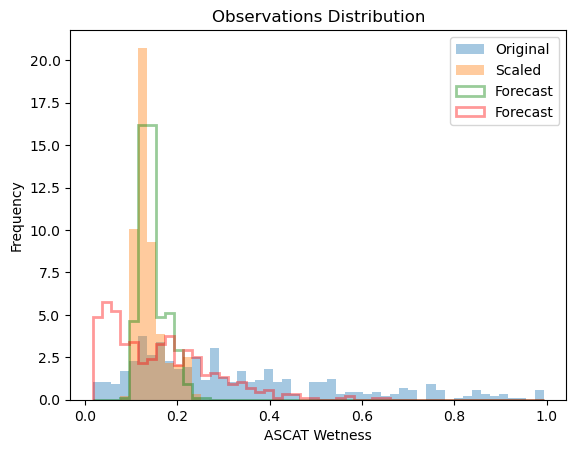

In [20]:
# Define bin edges
combined_data = np.concatenate([data1, data2, data3, data4])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data1, density=True, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0.4, label='Scaled')
n3, bins, patches = ax.hist(data3, density=True, bins=bin_edges, alpha=0.4, label='Forecast', color='green', histtype='step', linewidth=2)
n3, bins, patches = ax.hist(data4, density=True, bins=bin_edges, alpha=0.4, label='Forecast', color='red', histtype='step', linewidth=2)

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Frequency')
ax.set_title('Observations Distribution')
ax.legend()

savename = 'obs_dis_fqy.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

In [ ]:
# Count the number of negative values
num_negatives = np.sum(obs_obs2 < 0)

# Print the result
print("Number of negative values:", num_negatives)

# Create a boolean mask for negative values
mask = obs_obs2 < 0

# Create a new array containing only the negative values
negatives = obs_obs2[mask]

# Print the negative values
print("Negative values:", negatives)

# Get the indices of the negative values
indices = np.where(mask)[0]

# Print the indices of the negative values
print("Indices of negative values:", indices)

 Saving figure as obs_dis_fqy.png 



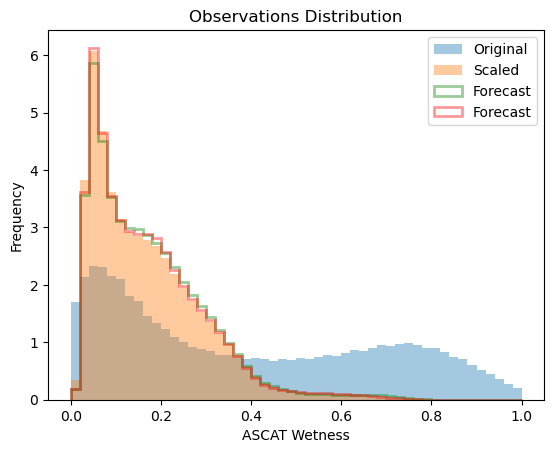

In [10]:
# Generate data
data1 = obs_obs
data2 = obs_obs2
data3 = obs_fcst
data4 = obs_fcst2

# Define bin edges
combined_data = np.concatenate([data1, data2, data3, data4])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data1, density=True, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0.4, label='Scaled')
n3, bins, patches = ax.hist(data3, density=True, bins=bin_edges, alpha=0.4, label='Forecast', color='green', histtype='step', linewidth=2)
n4, bins, patches = ax.hist(data4, density=True, bins=bin_edges, alpha=0.4, label='Forecast', color='red', histtype='step', linewidth=2)

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Frequency')
ax.set_title('Observations Distribution')
ax.legend()

savename = 'obs_dis_fqy.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

 Saving figure as obs_dis_fqy.png 



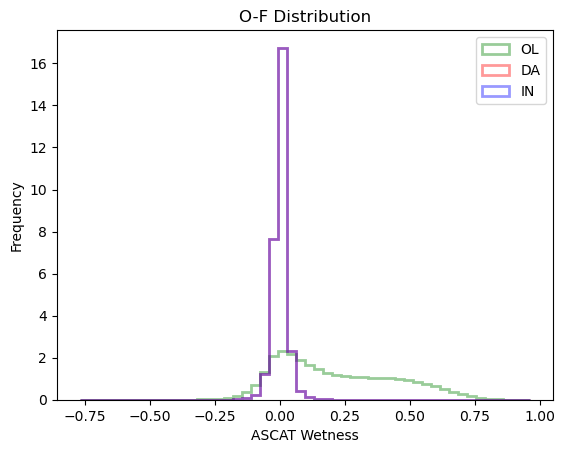

In [12]:
# Generate data
data1 = obs_obs - obs_fcst
data2 = obs_obs2 - obs_fcst2
data3 = obs_obs3 - obs_fcst3

# Define bin edges
combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n1, bins, patches = ax.hist(data1, density=True, bins=bin_edges, alpha=0.4, label='OL', color='green', histtype='step', linewidth=2)
n2, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0.4, label='DA', color='red', histtype='step', linewidth=2)
n2, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0.4, label='IN', color='blue', histtype='step', linewidth=2)

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Frequency')
ax.set_title('O-F Distribution')
ax.legend()

savename = 'obs_dis_fqy.png'
print(" Saving figure as", savename, "\n")
# plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

In [14]:
np.nanmean(obs_fcst2), np.nanmean(obs_fcst3)

(0.17076293387883687, 0.17350886280501865)

In [ ]:
import re

# Define the list of files
files = ['/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/rc_out/Y2015/M04/ASCAT_new_scaling_innov.ldas_log.20150401_0000z.txt',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/rc_out/Y2015/M10/ASCAT_new_scaling_innov.ldas_log.20151001_0000z.txt',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/rc_out/Y2016/M04/ASCAT_new_scaling_innov.ldas_log.20160401_0000z.txt']

# Define the regular expression pattern
pattern = r'Total count: (\d+)  Less than count: (\d+)  Greater than count: (\d+)'

# Initialize lists to store the counts
total_counts = []
less_than_counts = []
greater_than_counts = []

# Loop over the files
for file in files:
    # Open the file for reading
    with open(file, 'r') as f:
        # Read the file contents
        contents = f.read()

        # Find all the lines that match the pattern
        matches = re.findall(pattern, contents)

        # Append the counts to the lists
        total_counts.extend([int(match[0]) for match in matches])
        less_than_counts.extend([int(match[1]) for match in matches])
        greater_than_counts.extend([int(match[2]) for match in matches])

# Calculate the means of the counts
mean_total_count = sum(total_counts) / len(total_counts)
mean_less_than_count = sum(less_than_counts) / len(less_than_counts)
mean_greater_than_count = sum(greater_than_counts) / len(greater_than_counts)

# Print the mean counts
print(f'Number of observation species windows: {len(total_counts)}')    
print(f'Mean total count: {mean_total_count}')
print(f'Mean less than count: {mean_less_than_count}')
print(f'Mean greater than count: {mean_greater_than_count}')

print(f'Percentage of observations removed because too low: {mean_less_than_count / mean_total_count * 100:.2f}%')
print(f'Percentage of observations removed because too high: {mean_greater_than_count / mean_total_count * 100:.2f}%')

Total number of obs =  69767
Total number of obs =  80923
Total number of obs =  78981
Total number of obs =  80211
Total number of obs =  83074
Total number of obs =  79162
Total number of obs =  83179
Total number of obs =  85218
Total number of obs =  87004
Total number of obs =  92316
Total number of obs =  95868
Total number of obs =  98797
Total number of obs =  99932
Total number of obs =  101004
Total number of obs =  96604
Total number of obs =  101441
Total number of obs =  101284
Total number of obs =  98733
Total number of obs =  100297
Total number of obs =  100949
Total number of obs =  105394
Total number of obs =  106114
Total number of obs =  104780
Total number of obs =  108824
Total number of obs =  106335
Total number of obs =  108971
Total number of obs =  109249
Total number of obs =  109880
Total number of obs =  113936
Total number of obs =  110208
Total number of obs =  112937
Total number of obs =  112738
Total number of obs =  114807
Total number of obs =  11

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


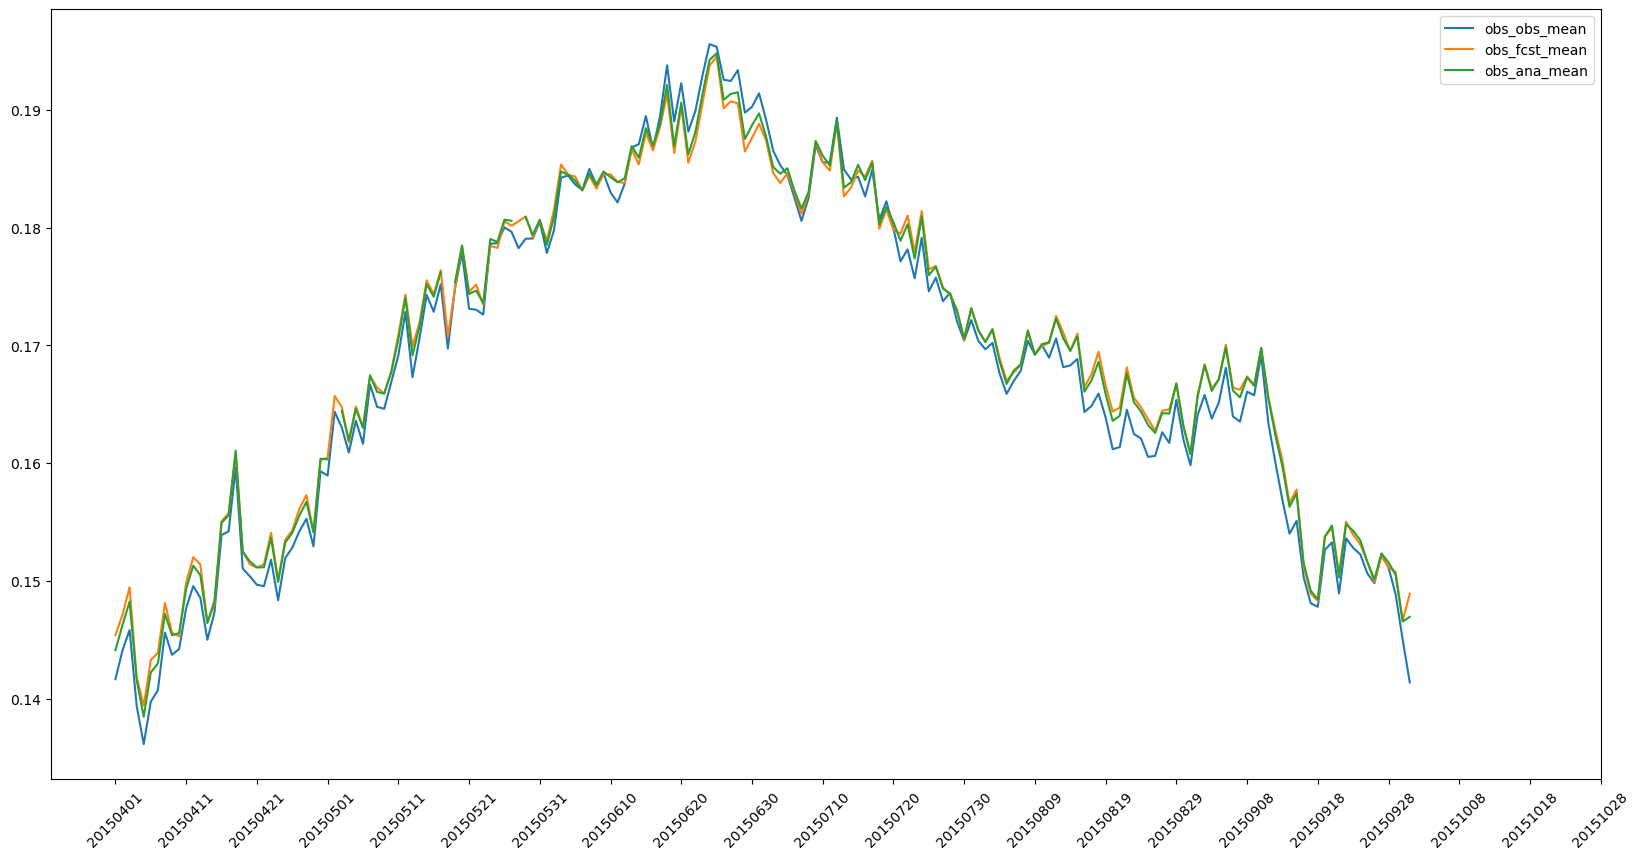

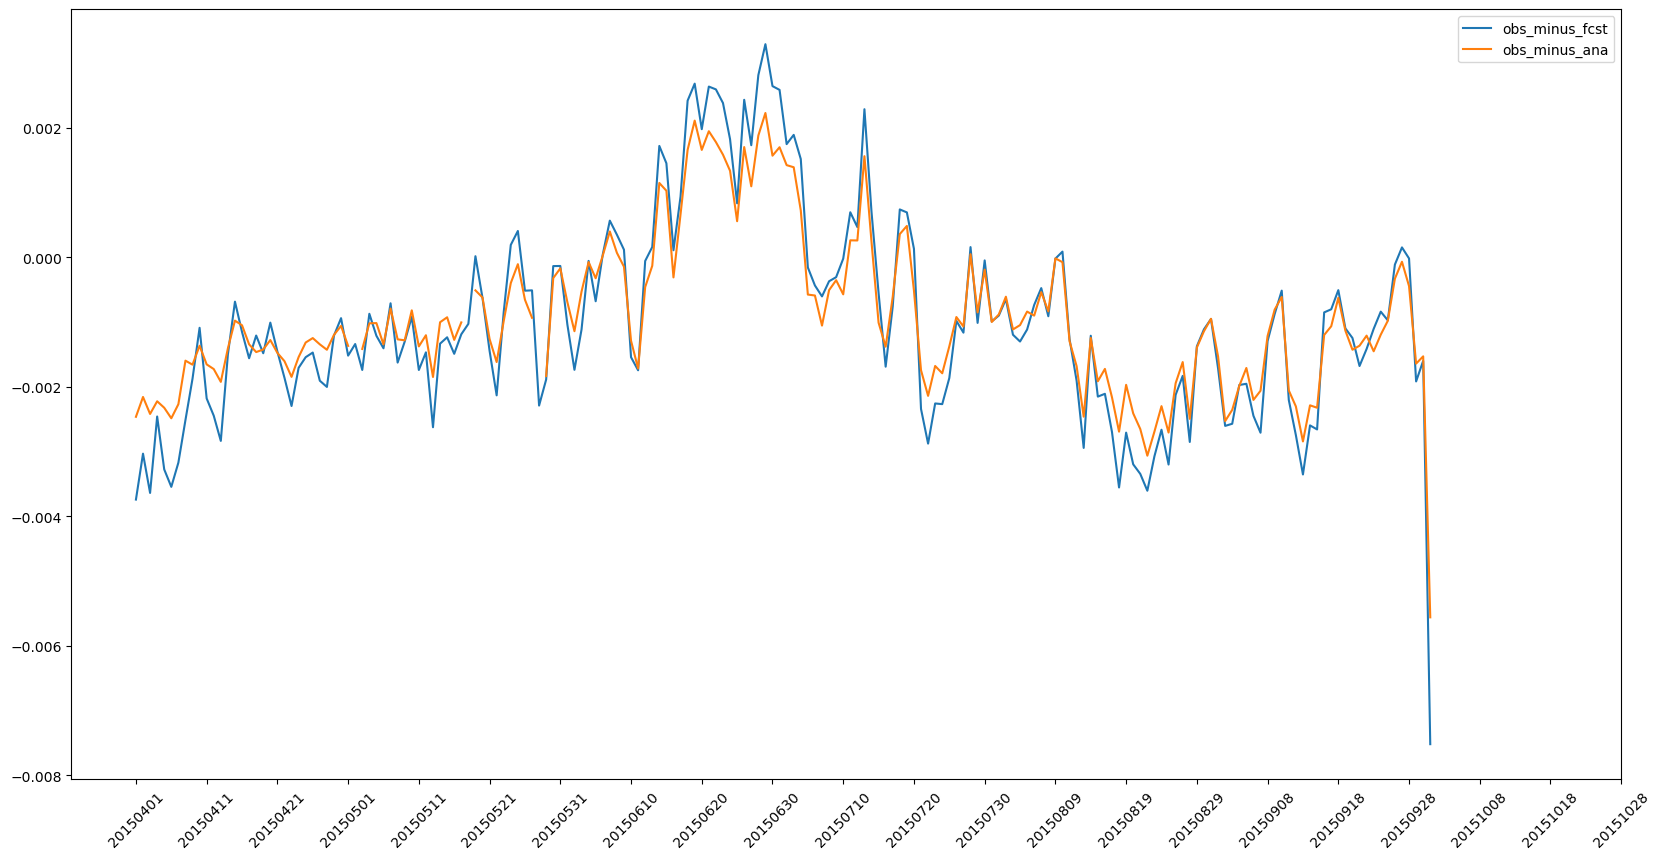

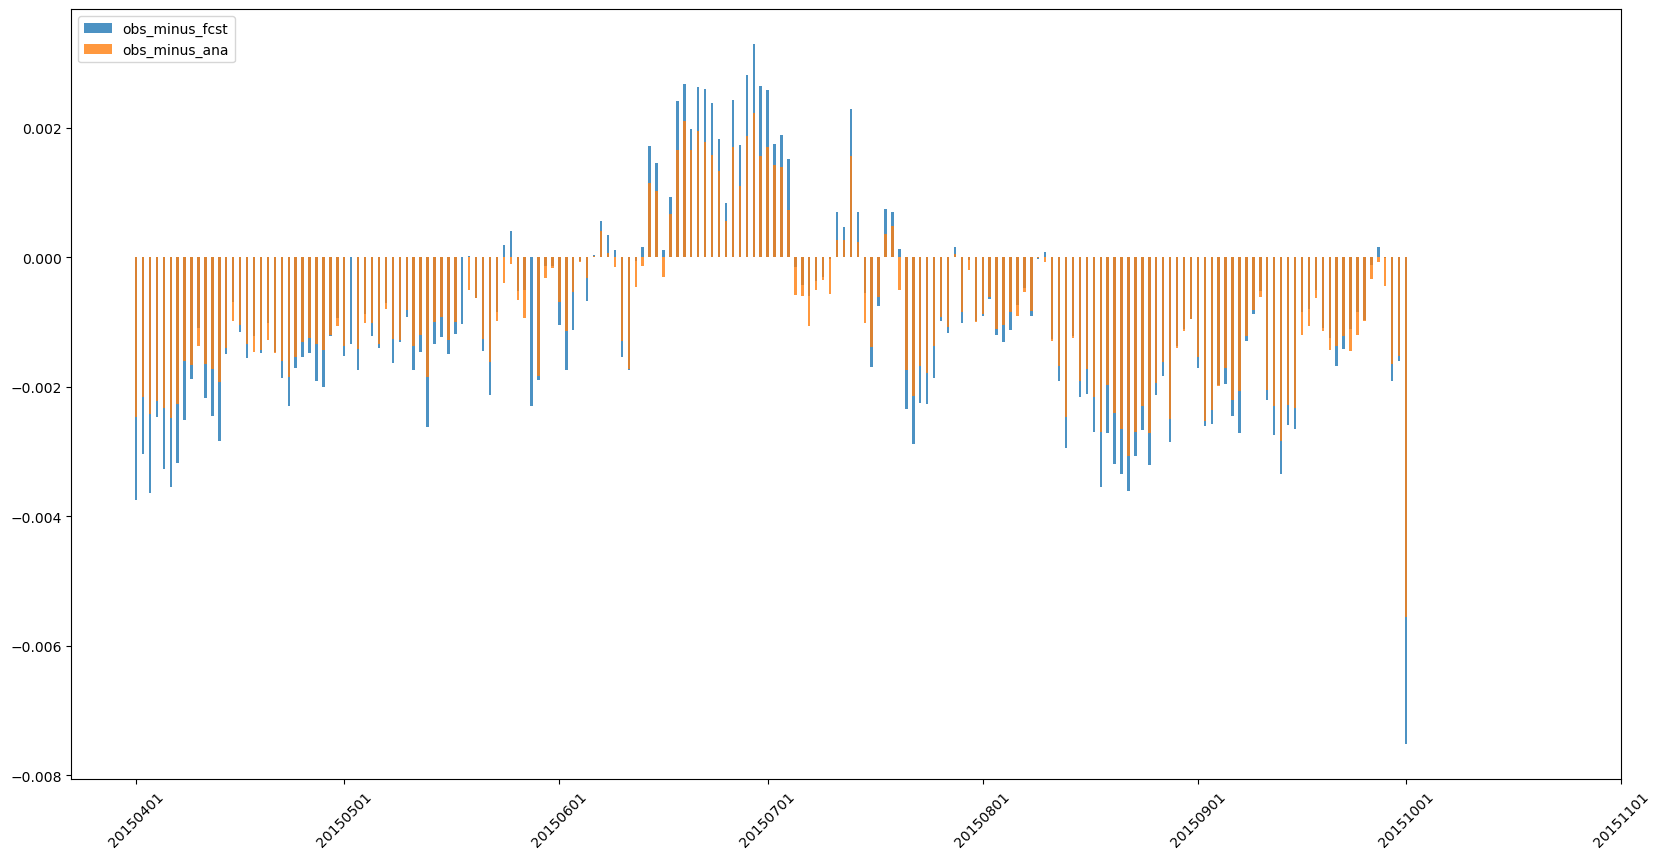

In [18]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from my_functions import read_obsfcstana

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_compressed/ASCAT_test_new_scaling_compressed/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_compressed.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list = []
obs_fcst_mean_list = []
obs_ana_mean_list = []
omf_mean_list = []
oma_mean_list = []
dates_list = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151101', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list.append(obs_obs_mean)
    obs_fcst_mean_list.append(obs_fcst_mean)
    obs_ana_mean_list.append(obs_ana_mean)
    omf_mean_list.append(omf_mean)
    oma_mean_list.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

# Create a plot of the mean values
plt.figure(figsize=(20,10))
plt.plot(dates_list, obs_obs_mean_list, label='obs_obs_mean')
plt.plot(dates_list, obs_fcst_mean_list, label='obs_fcst_mean')
plt.plot(dates_list, obs_ana_mean_list, label='obs_ana_mean')
plt.legend()

# Set the x-axis tick labels to show every 10 days
xticks = dates_list[::10]
plt.xticks(xticks, rotation=45)

plt.show()

# Create a plot of the mean values
plt.figure(figsize=(20,10))
plt.plot(dates_list, omf_mean_list, label='obs_minus_fcst')
plt.plot(dates_list, oma_mean_list, label='obs_minus_ana')
plt.legend()

# Set the x-axis tick labels to show every 10 days
xticks = dates_list[::10]
plt.xticks(xticks, rotation=45)

plt.show()

# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(dates_list))
plt.bar(index, omf_mean_list, bar_width, alpha=opacity, label='obs_minus_fcst')
plt.bar(index, oma_mean_list, bar_width, alpha=opacity, label='obs_minus_ana')

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list if date.endswith('01')]
xtick_indices = [dates_list.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

plt.legend()
plt.show()

Total number of obs =  69757
Total number of obs =  80911
Total number of obs =  78966
Total number of obs =  80217
Total number of obs =  83055
Total number of obs =  79164
Total number of obs =  83161
Total number of obs =  85177
Total number of obs =  86992
Total number of obs =  92286
Total number of obs =  95854
Total number of obs =  98753
Total number of obs =  99894
Total number of obs =  101001
Total number of obs =  96602
Total number of obs =  101425
Total number of obs =  101265
Total number of obs =  98717
Total number of obs =  100289
Total number of obs =  100875
Total number of obs =  105380
Total number of obs =  106092
Total number of obs =  104775
Total number of obs =  108839
Total number of obs =  106348
Total number of obs =  108982
Total number of obs =  109237
Total number of obs =  109879
Total number of obs =  113904
Total number of obs =  110176
Total number of obs =  112920
Total number of obs =  112760
Total number of obs =  114873
Total number of obs =  11

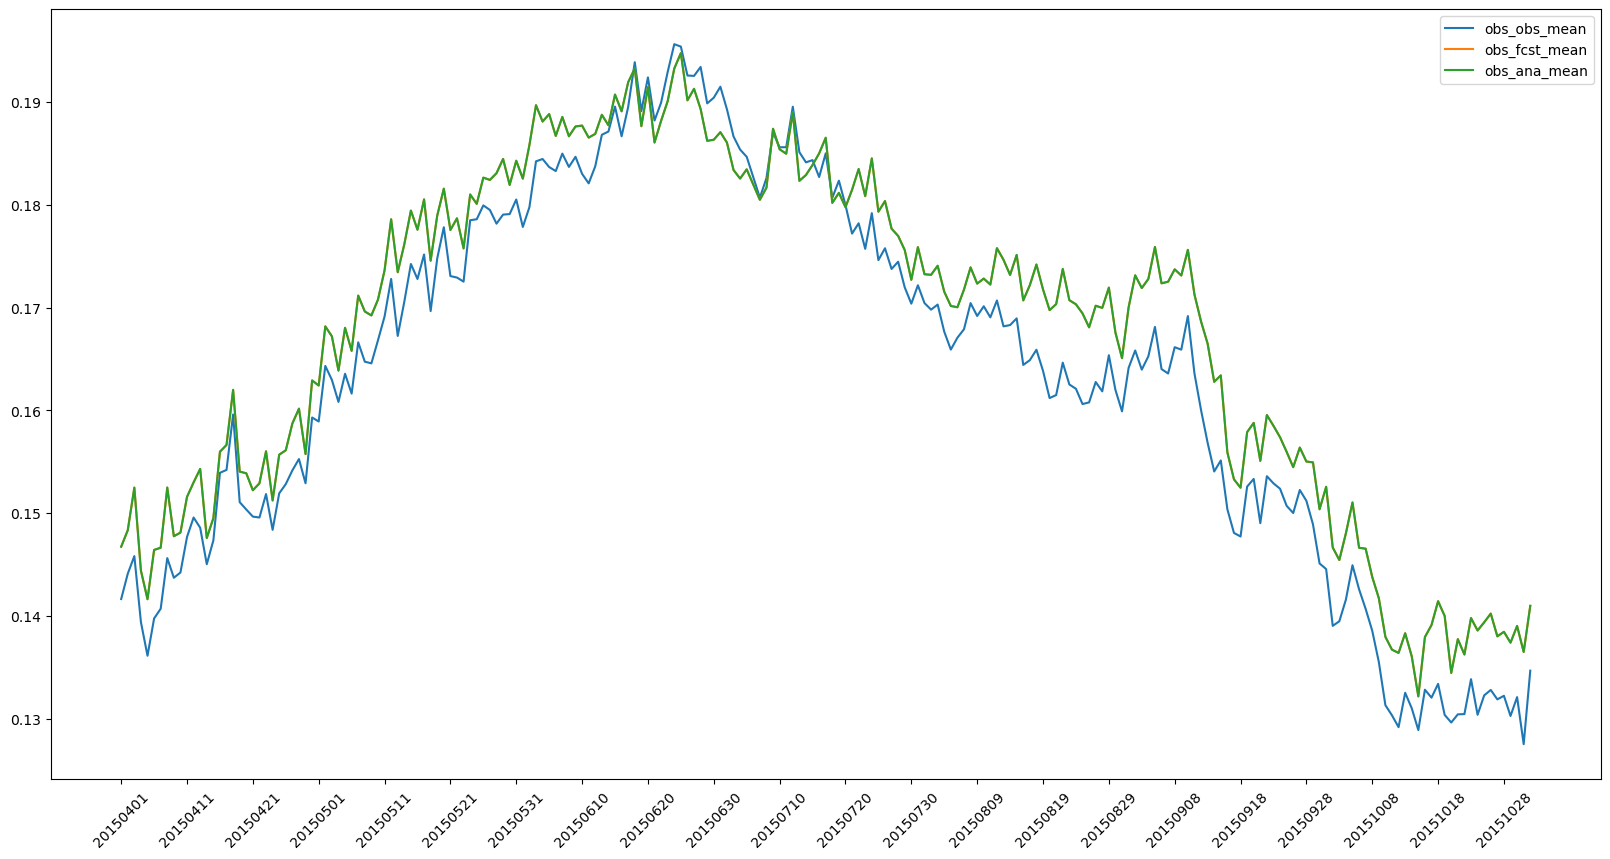

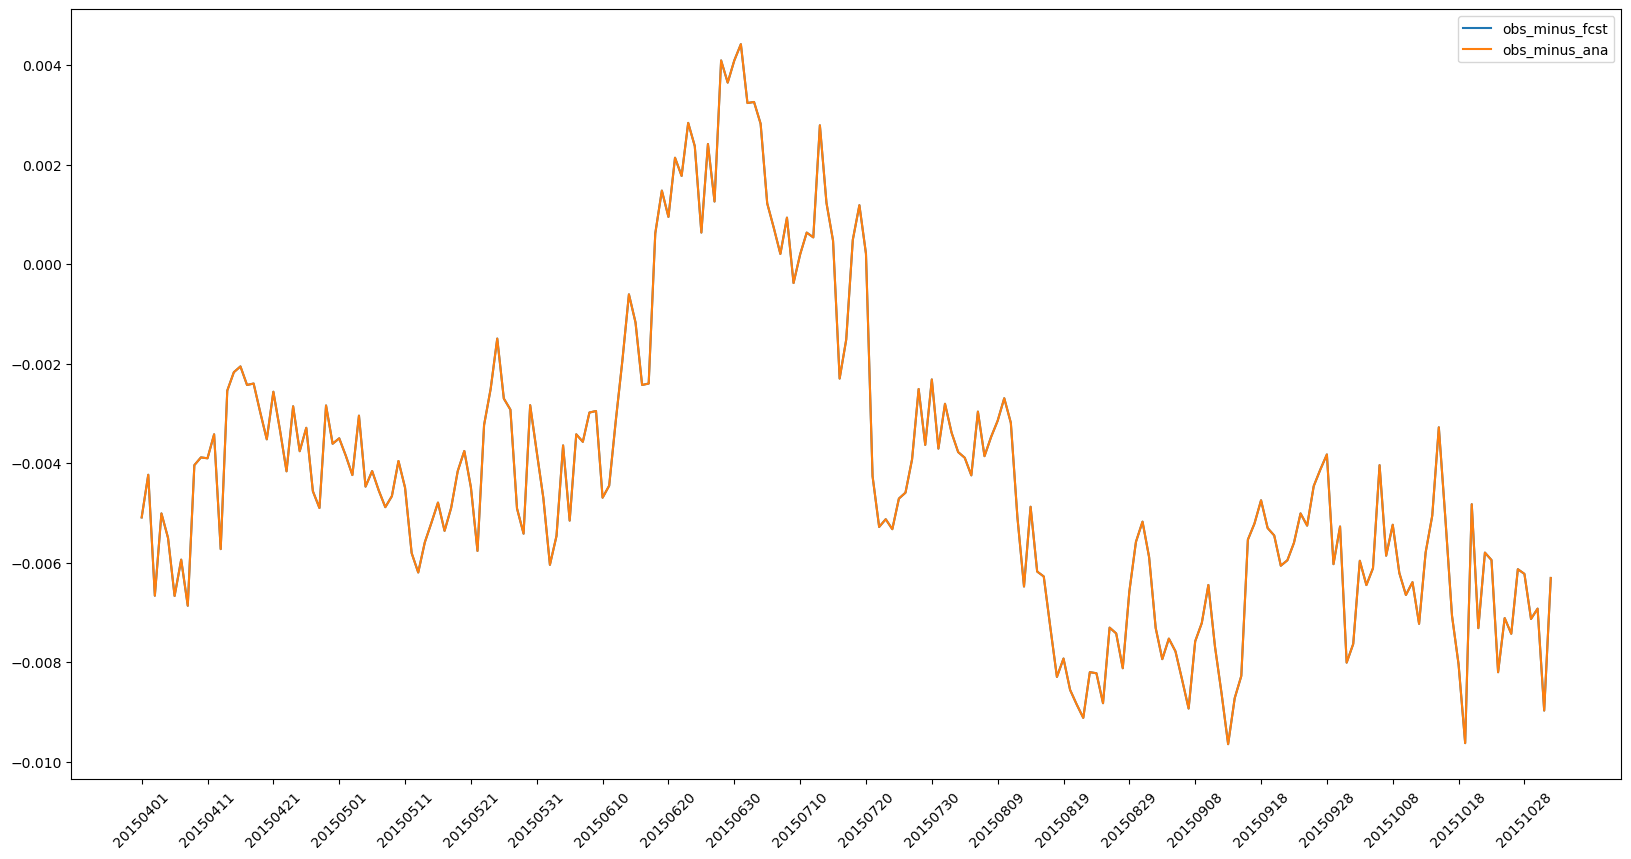

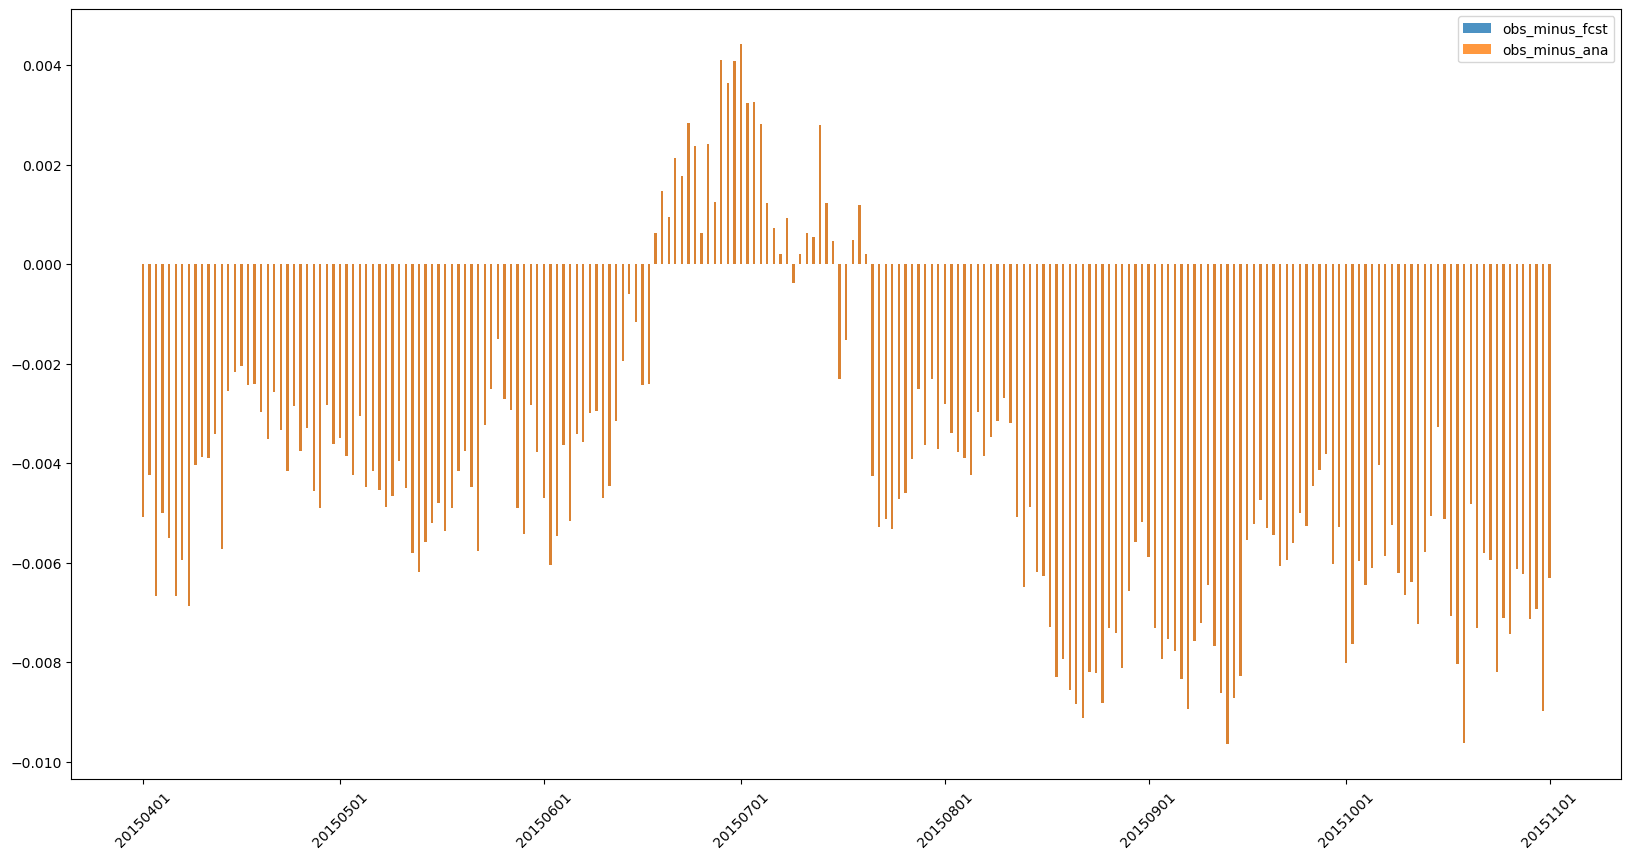

In [15]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from my_functions import read_obsfcstana

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_i = []
obs_fcst_mean_list_i = []
obs_ana_mean_list_i = []
omf_mean_list_i = []
oma_mean_list_i = []
dates_list_i = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151101', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_i.append(obs_obs_mean)
    obs_fcst_mean_list_i.append(obs_fcst_mean)
    obs_ana_mean_list_i.append(obs_ana_mean)
    omf_mean_list_i.append(omf_mean)
    oma_mean_list_i.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_i.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

# Create a plot of the mean values
plt.figure(figsize=(20,10))
plt.plot(dates_list, obs_obs_mean_list_i, label='obs_obs_mean')
plt.plot(dates_list, obs_fcst_mean_list_i, label='obs_fcst_mean')
plt.plot(dates_list, obs_ana_mean_list_i, label='obs_ana_mean')
plt.legend()

# Set the x-axis tick labels to show every 10 days
xticks = dates_list[::10]
plt.xticks(xticks, rotation=45)

plt.show()

# Create a plot of the mean values
plt.figure(figsize=(20,10))
plt.plot(dates_list, omf_mean_list_i, label='obs_minus_fcst')
plt.plot(dates_list, oma_mean_list_i, label='obs_minus_ana')
plt.legend()

# Set the x-axis tick labels to show every 10 days
xticks = dates_list[::10]
plt.xticks(xticks, rotation=45)

plt.show()

# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(dates_list))
plt.bar(index, omf_mean_list_i, bar_width, alpha=opacity, label='obs_minus_fcst')
plt.bar(index, oma_mean_list_i, bar_width, alpha=opacity, label='obs_minus_ana')

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list if date.endswith('01')]
xtick_indices = [dates_list.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

plt.legend()
plt.show()

In [24]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling/ASCAT_test_new_scaling/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_2 = []
obs_fcst_mean_list_2 = []
obs_ana_mean_list_2 = []
omf_mean_list_2 = []
oma_mean_list_2 = []
dates_list_2 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151101', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_2.append(obs_obs_mean)
    obs_fcst_mean_list_2.append(obs_fcst_mean)
    obs_ana_mean_list_2.append(obs_ana_mean)
    omf_mean_list_2.append(omf_mean)
    oma_mean_list_2.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_2.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

Total number of obs =  69767
Total number of obs =  80923
Total number of obs =  78981
Total number of obs =  80211
Total number of obs =  83074
Total number of obs =  79166
Total number of obs =  83179
Total number of obs =  85218
Total number of obs =  87004
Total number of obs =  92316
Total number of obs =  95868
Total number of obs =  98797
Total number of obs =  99932
Total number of obs =  101004
Total number of obs =  96604
Total number of obs =  101441
Total number of obs =  101284
Total number of obs =  98733
Total number of obs =  100297
Total number of obs =  100949
Total number of obs =  8464
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number of obs =  0
Total number

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Y/ASCAT_test_new_scaling_1Y/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Y.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_3 = []
obs_fcst_mean_list_3 = []
obs_ana_mean_list_3 = []
omf_mean_list_3 = []
oma_mean_list_3 = []
dates_list_3 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151101', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_3.append(obs_obs_mean)
    obs_fcst_mean_list_3.append(obs_fcst_mean)
    obs_ana_mean_list_3.append(obs_ana_mean)
    omf_mean_list_3.append(omf_mean)
    oma_mean_list_3.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_3.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

Total number of obs =  69767
Total number of obs =  80923
Total number of obs =  78981
Total number of obs =  80211
Total number of obs =  83074
Total number of obs =  79166
Total number of obs =  83179
Total number of obs =  85218
Total number of obs =  87004
Total number of obs =  92316
Total number of obs =  95868
Total number of obs =  98797
Total number of obs =  99932
Total number of obs =  101004
Total number of obs =  96604
Total number of obs =  101441
Total number of obs =  101284
Total number of obs =  98733
Total number of obs =  100297
Total number of obs =  100949
Total number of obs =  105394
Total number of obs =  106114
Total number of obs =  104780
Total number of obs =  108824
Total number of obs =  106335
Total number of obs =  108971
Total number of obs =  109249
Total number of obs =  109880
Total number of obs =  113936
Total number of obs =  110208
Total number of obs =  112937
Total number of obs =  112781
Total number of obs =  114904
Total number of obs =  11

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


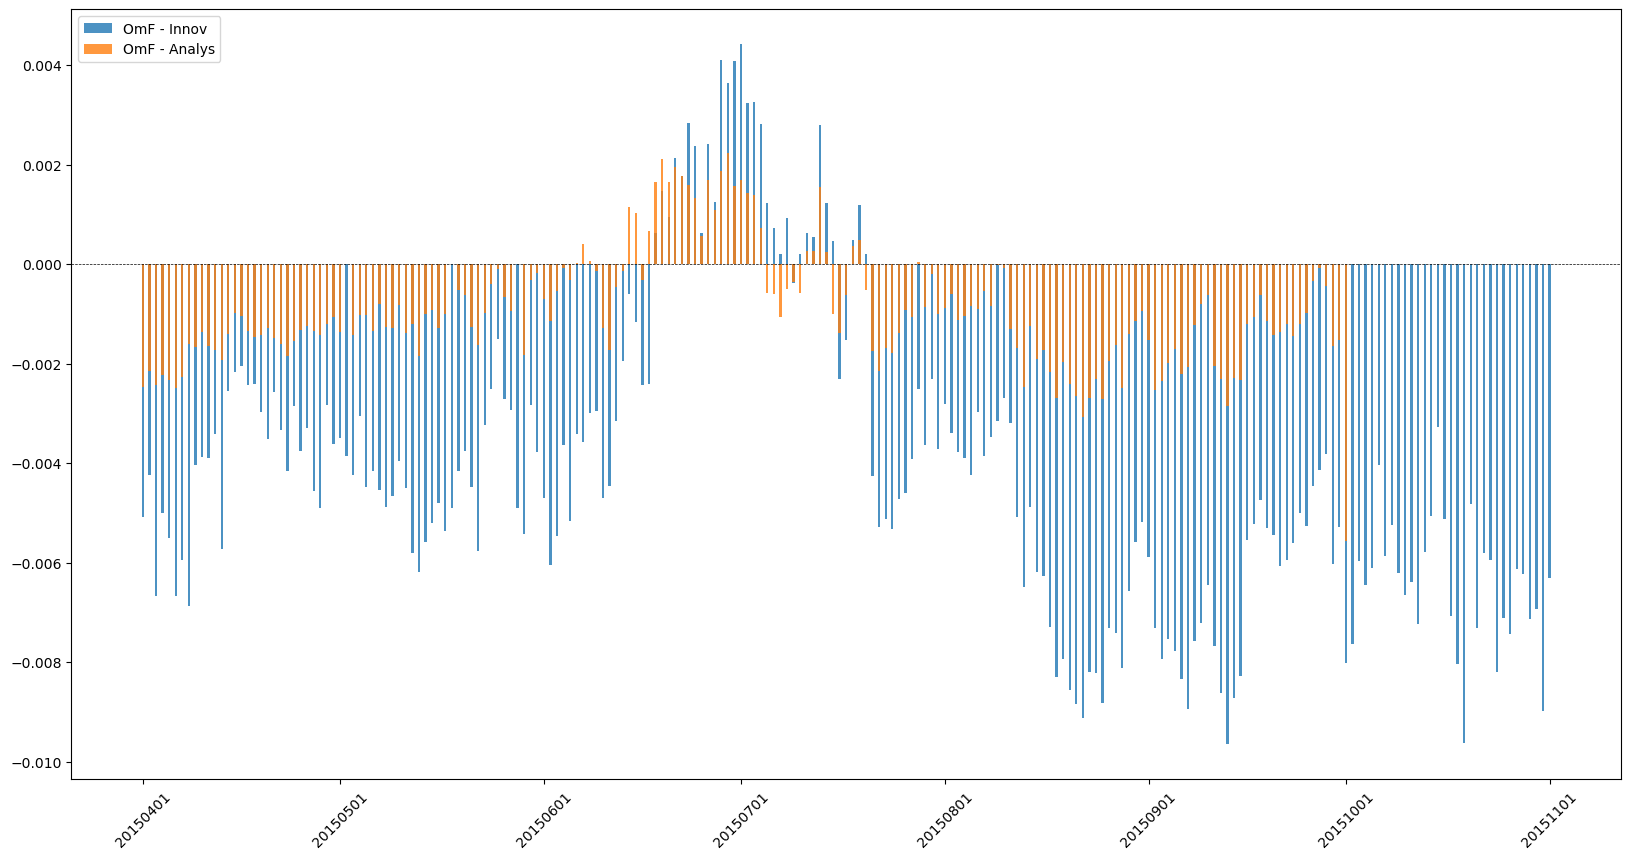

In [23]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(dates_list))
plt.bar(index, omf_mean_list_i, bar_width, alpha=opacity, label='OmF - Innov')
plt.bar(index, oma_mean_list, bar_width, alpha=opacity, label='OmF - Analys')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list if date.endswith('01')]
xtick_indices = [dates_list.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

plt.legend()
plt.show()

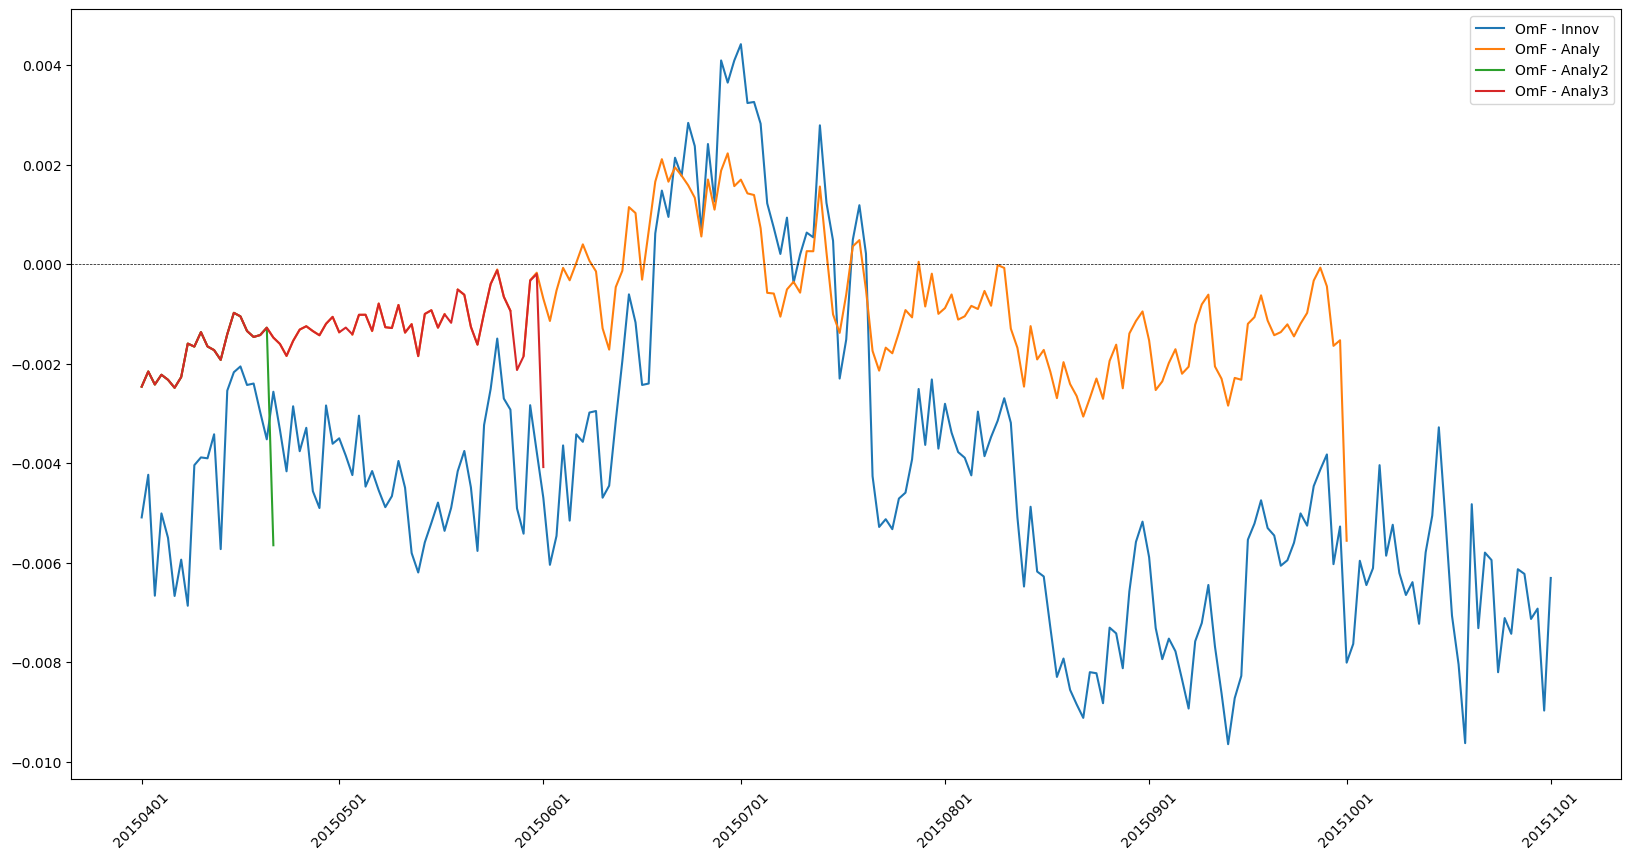

In [27]:
# Create a plot of the mean values
plt.figure(figsize=(20,10))
plt.plot(dates_list, omf_mean_list_i, label='OmF - Innov')
plt.plot(dates_list, oma_mean_list, label='OmF - Analy')
plt.plot(dates_list, oma_mean_list_2, label='OmF - Analy2')
plt.plot(dates_list, oma_mean_list_3, label='OmF - Analy3')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0
plt.legend()

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list if date.endswith('01')]
xtick_indices = [dates_list.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

plt.show()